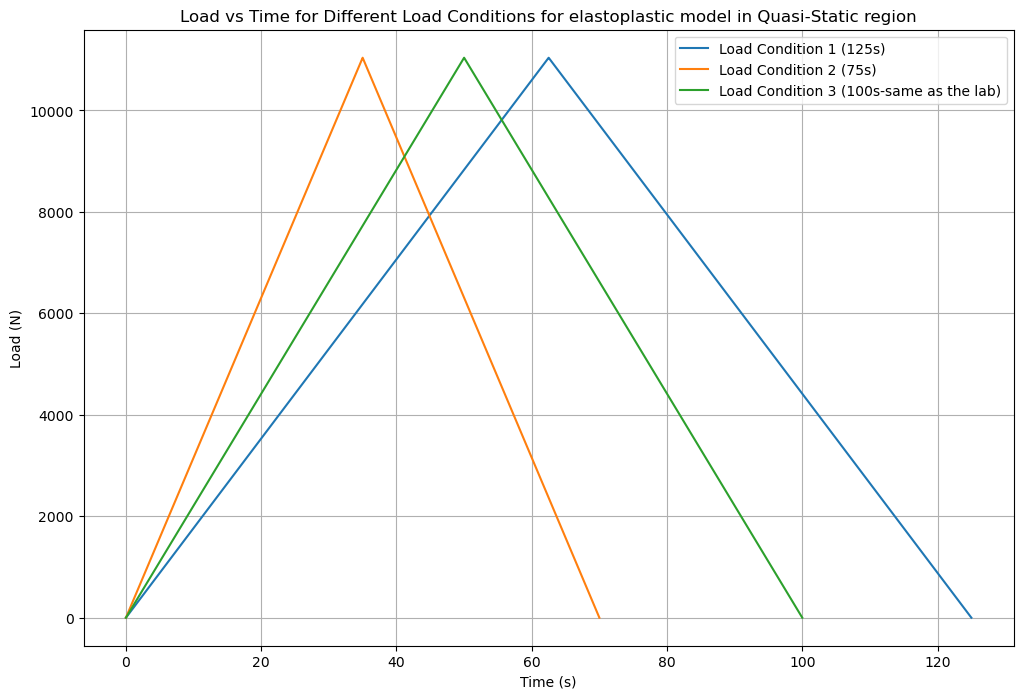

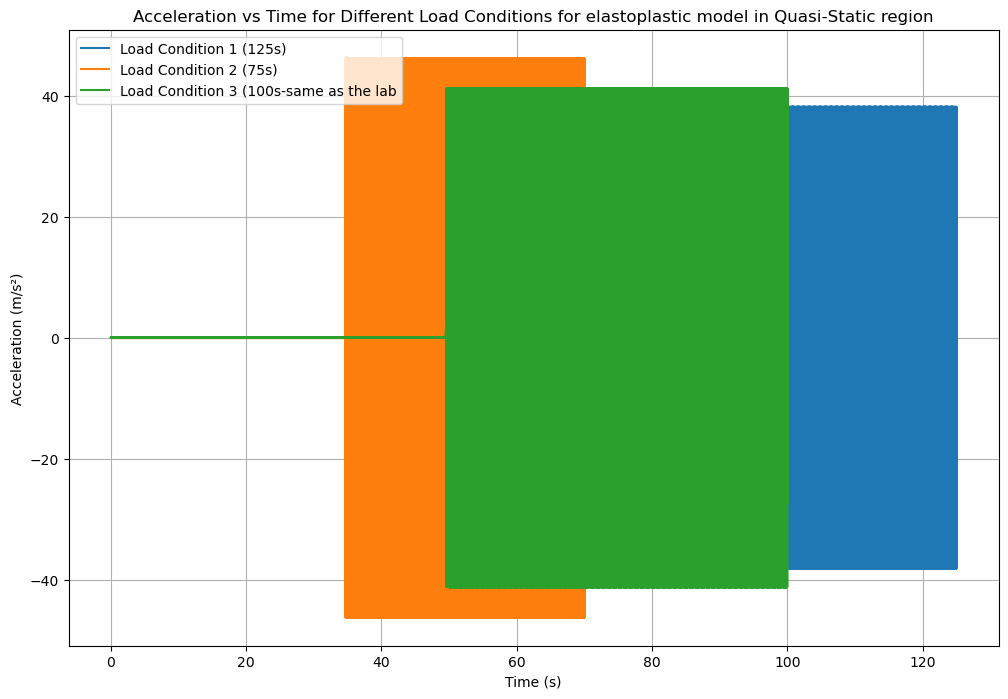

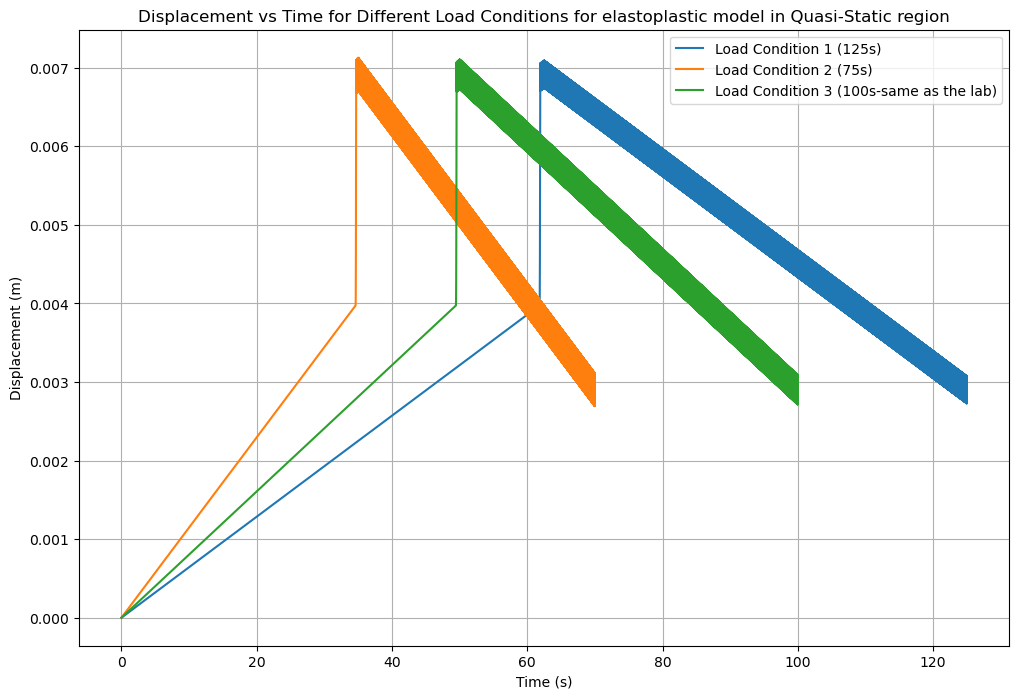

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# To calculate the natural period of the system
def get_natural_period(M, k):
    return (2 * np.pi * math.sqrt(M)) / math.sqrt(k)

# To calculate the load against the time of application of load for different conditions
def get_load_value(x, max_load, rise_time, fall_time):
    if 0 <= x <= rise_time:
        return (max_load / rise_time) * x
    elif rise_time < x <= fall_time:
        return -(max_load / rise_time) * x + 2 * max_load
    else:
        return 0

# Material properties
k = 2747601        # Stiffness of the spring (N/m)
W = 121.94         # Weight of the beam (N)
M = W / 9.81       # Mass of beam (kg)
Rm = 11040 - W         # Resistance (N)


# Calculation of Elastic Limit
yel = Rm / k
ym = 1.73*yel       # Maximum displacement limit for beam according to peak load applied (m)


# Calculation of natural period and time step
reduction_factor = 0.001
natural_period = get_natural_period(M, k)  # Calculate the natural period of the system

# First load condition
T1 = 125           # Total time (sec)
delta_t1 = natural_period * reduction_factor  # Apply reduction factor and calculate the time step delta_t
n_t_steps1 = int(T1 / delta_t1)  # Number of time steps
t1 = np.linspace(0, T1, n_t_steps1)  # Initialize the time domain

Load1 = np.array([get_load_value(x, 11040 , 62.5, 125) for x in t1])

# Displacement and acceleration arrays
Disp1 = np.zeros(n_t_steps1)
Acc1 = np.zeros(n_t_steps1)

# Initial conditions
Disp1[0] = 0
Acc1[0] = 0
Trip1 = 0

# Displacement calculation loop
for count in range(n_t_steps1 - 1):
    if Trip1 == 0:
        if Disp1[count] < yel:
            Acc1[count] = (Load1[count] - k * Disp1[count]) / M
        elif yel < Disp1[count] <= ym:
            Acc1[count] = (Load1[count] - Rm) / M

        elif Disp1[count] >= ym:
            Trip1 = 1
            Acc1[count] = (Load1[count] - Rm + k * (ym - Disp1[count])) / M
    else:
        Acc1[count] = (Load1[count] - Rm + k * (ym - Disp1[count])) / M

    # Update displacement using Newmark-beta method
    if count == 0:
        Disp1[count + 1] = 0.5 * Acc1[count] * delta_t1 ** 2
    else:
        Disp1[count + 1] = 2 * Disp1[count] - Disp1[count - 1] + Acc1[count] * delta_t1 ** 2
        

# Second load condition
T2 = 70           # Total time (sec)
delta_t2 = natural_period * reduction_factor  # Apply reduction factor and calculate the time step delta_t
n_t_steps2 = int(T2 / delta_t2)  # Number of time steps
t2 = np.linspace(0, T2, n_t_steps2)  # Initialize the time domain

Load2 = np.array([get_load_value(x, 11040, 35, 70) for x in t2])

# Displacement and acceleration arrays
Disp2 = np.zeros(n_t_steps2)
Acc2 = np.zeros(n_t_steps2)

# Initial conditions
Disp2[0] = 0
Acc2[0] = 0
Trip2 = 0

# Displacement calculation loop
for count in range(n_t_steps2 - 1):
    if Trip2 == 0:
        if Disp2[count] < yel:
            Acc2[count] = (Load2[count] - k * Disp2[count]) / M
        elif Disp2[count] <= ym:
            Acc2[count] = (Load2[count] - Rm) / M

        if Disp2[count] >= ym:
            Trip2 = 1
            Acc2[count] = (Load2[count] - Rm + k * (ym - Disp2[count])) / M
    else:
        Acc2[count] = (Load2[count] - Rm + k * (ym - Disp2[count])) / M

    # Update displacement using Newmark-beta method
    if count == 0:
        Disp2[count + 1] = 0.5 * Acc2[count] * delta_t2 ** 2
    else:
        Disp2[count + 1] = 2 * Disp2[count] - Disp2[count - 1] + Acc2[count] * delta_t2 ** 2

# Third load condition
T3 = 100           # Total time (sec)
delta_t3 = natural_period * reduction_factor  # Apply reduction factor and calculate the time step delta_t
n_t_steps3 = int(T3 / delta_t3)  # Number of time steps
t3 = np.linspace(0, T3, n_t_steps3)  # Initialize the time domain

Load3 = np.array([get_load_value(x, 11040, 50, 100) for x in t3])

# Displacement and acceleration arrays
Disp3 = np.zeros(n_t_steps3)
Acc3 = np.zeros(n_t_steps3)

# Initial conditions
Disp3[0] = 0
Acc3[0] = 0
Trip3 = 0

# Displacement calculation loop
for count in range(n_t_steps3 - 1):
    if Trip3 == 0:
        if Disp3[count] < yel:
            Acc3[count] = (Load3[count] - k * Disp3[count]) / M
        elif Disp3[count] <= ym:
            Acc3[count] = (Load3[count] - Rm) / M

        if Disp3[count] >= ym:
            Trip3 = 1
            Acc2[count] = (Load2[count] - Rm + k * (ym - Disp2[count])) / M
    else:
        Acc3[count] = (Load3[count] - Rm + k * (ym - Disp3[count])) / M

    # Update displacement using Newmark-beta method
    if count == 0:
        Disp3[count + 1] = 0.5 * Acc3[count] * delta_t3 ** 2
    else:
        Disp3[count + 1] = 2 * Disp3[count] - Disp3[count - 1] + Acc3[count] * delta_t3 ** 2
        


# Plot Load vs Time
plt.figure(figsize=(12, 8))
plt.plot(t1, Load1, label='Load Condition 1 (125s)')
plt.plot(t2, Load2, label='Load Condition 2 (75s)')
plt.plot(t3, Load3, label='Load Condition 3 (100s-same as the lab)')
plt.xlabel('Time (s)')
plt.ylabel('Load (N)')
plt.title('Load vs Time for Different Load Conditions for elastoplastic model in Quasi-Static region')
plt.legend()
plt.grid()
plt.show()

# Plot Acceleration vs Time
plt.figure(figsize=(12, 8))
plt.plot(t1, Acc1, label='Load Condition 1 (125s)')
plt.plot(t2, Acc2, label='Load Condition 2 (75s)')
plt.plot(t3, Acc3, label='Load Condition 3 (100s-same as the lab')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration vs Time for Different Load Conditions for elastoplastic model in Quasi-Static region')
plt.legend()
plt.grid()
plt.show()

# Plot Displacement vs Time
plt.figure(figsize=(12, 8))
plt.plot(t1, Disp1, label='Load Condition 1 (125s)')
plt.plot(t2, Disp2, label='Load Condition 2 (75s)')
plt.plot(t3, Disp3, label='Load Condition 3 (100s-same as the lab)')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Displacement vs Time for Different Load Conditions for elastoplastic model in Quasi-Static region')
plt.legend()
plt.grid()
plt.show()

